### Work in progress
Test och se om vi kan bättre utnyttja fält i Litteraturbankens json
* sbl_link --> Wikidata Property 3217 = Svenskt Biografiskt Lexikon
* skbl_link --> Wikidata Property 4963 = Svenskt kvinnobiografiskt lexikon
* sol_link ?!?!?!
* wikidata_id = Wikidata Qnummer
* wikipedia = Wikipedia URL


Denna [Notebook](https://github.com/salgo60/spa2Commons/blob/main/Notebook/Litteraturbanken%20-%20samma%20som.ipynb) och en [video](https://www.youtube.com/watch?v=52yEa4LdzFE) hur vi kopplar ihop med Litteraturbanken, Svenskt Porträttarkiv....
* [video exempel hur en post skapas i Wikidata](https://youtu.be/Grmp8_DZq8o)  
* [issue 3](https://github.com/salgo60/spa2Commons/issues/3) om vi kan bättre förstå hur Litteraturbanken arbetar
 
 [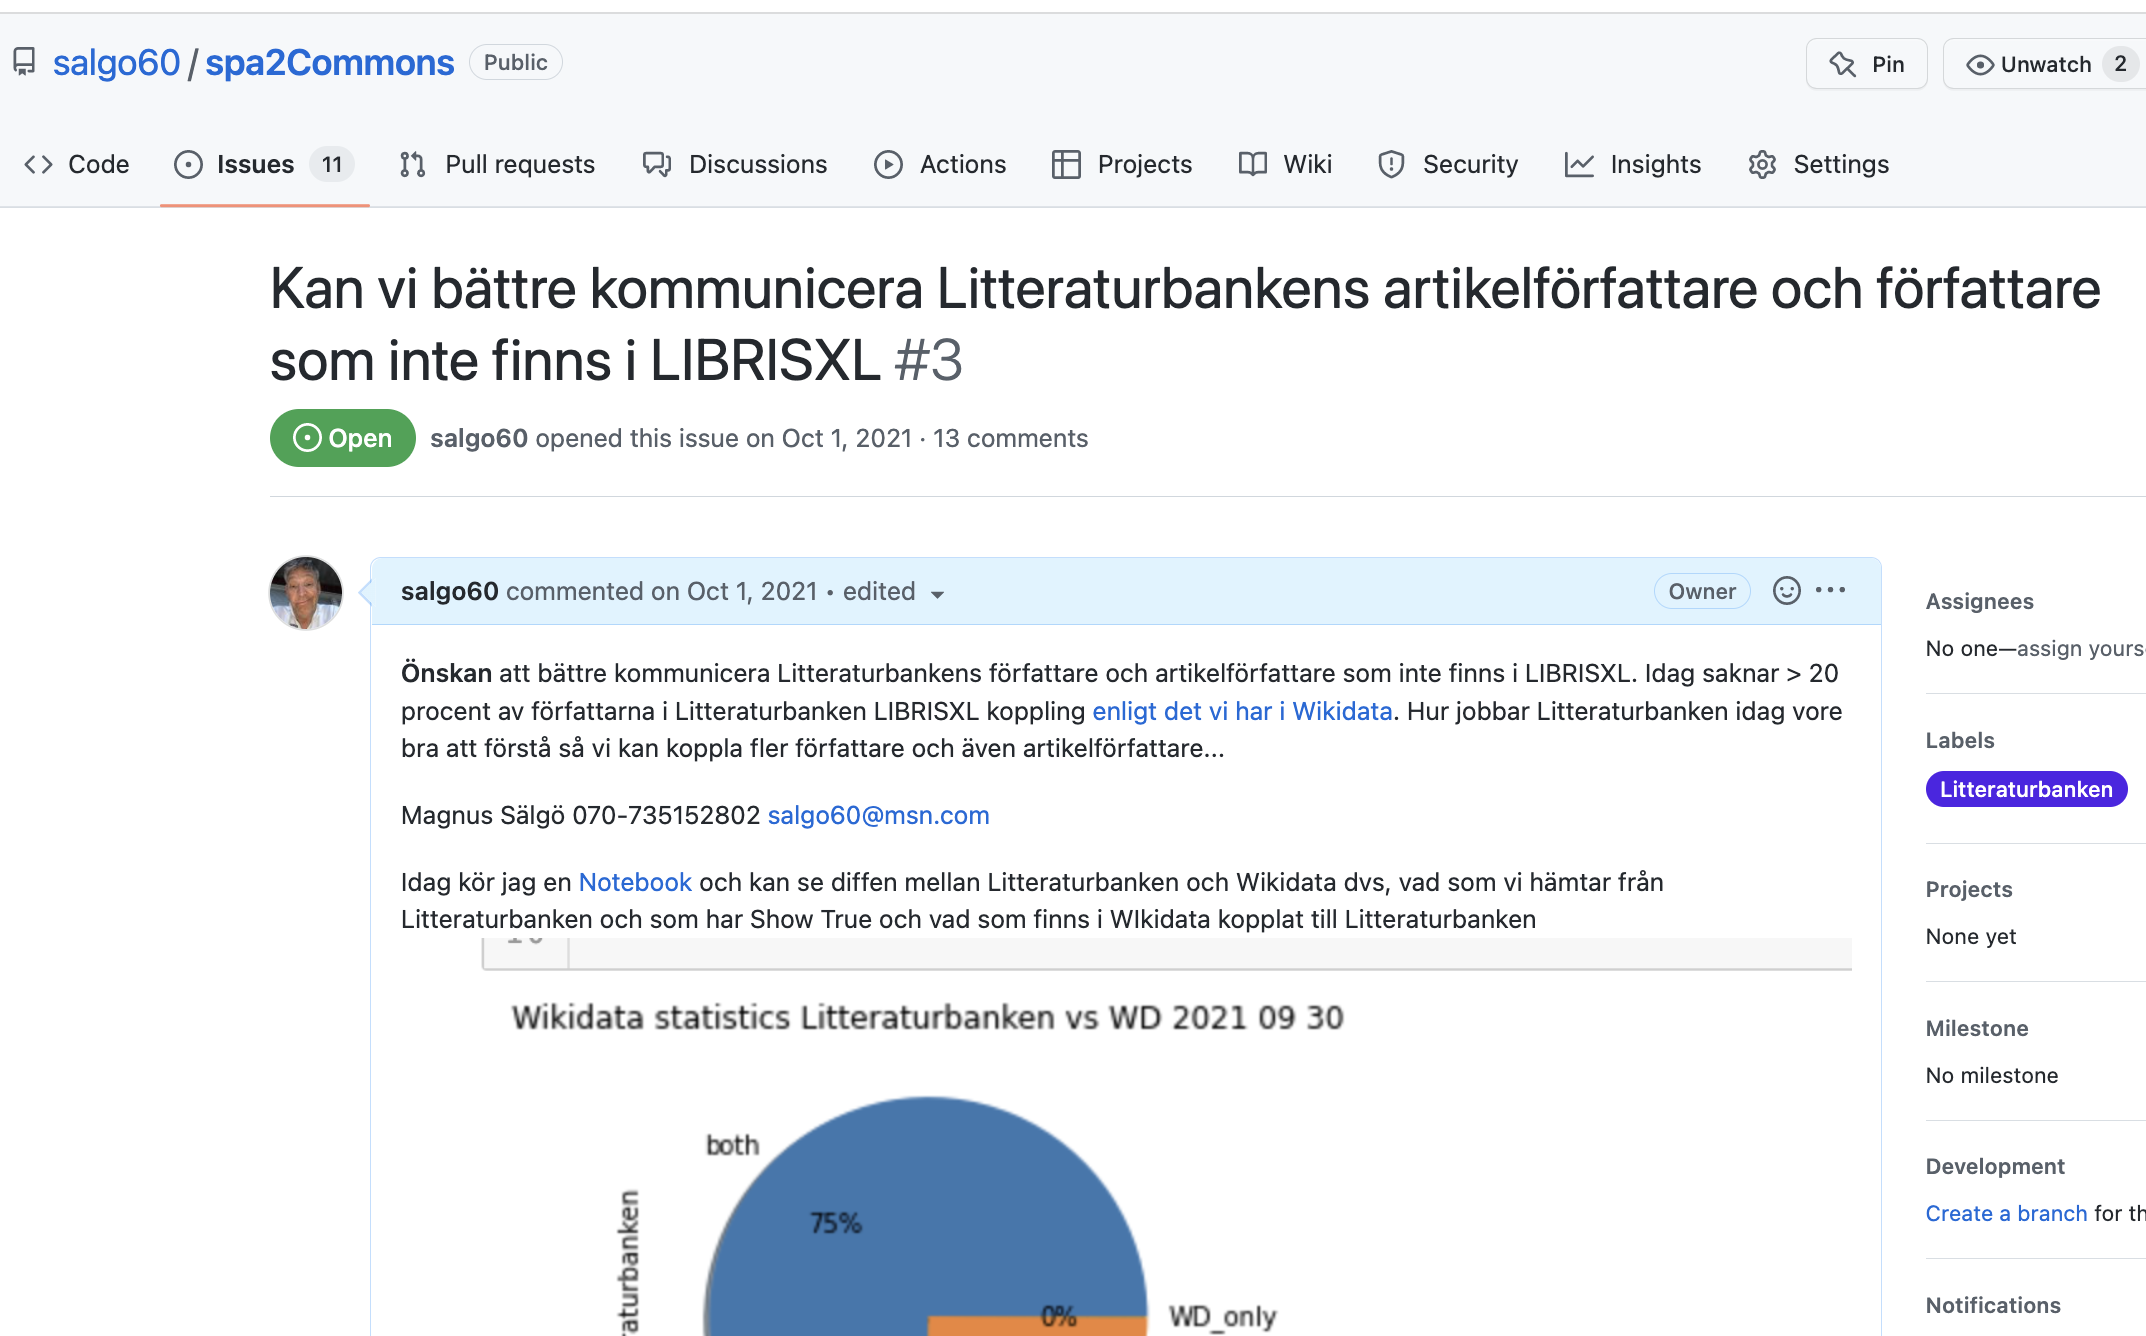](https://github.com/salgo60/spa2Commons/issues/3)

* synk WD - Litteraturbanken se [Notebook](https://github.com/salgo60/open-data-examples/blob/master/Litteraturbanken%20Author.ipynb)
**Connectivity status**

I en perfekt värld skall
* A = B = E
* C = F 
* D = G
* H = I  


| Date | A: Litteraturbanken show | B: Littbank - WD | C: Littbank - SBL | D: Littbank - SKBL|E: WD - Littbank | F: WD - Littbank - SBL  |G: WD - Littbank - SKBL  |
| ------------- |:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:| -----:|
| 20211001 | 3130 | 2132 | 765 | 152 | 2346 | 810 | 161
| 20211004 | 3130 | 2132 | 765 | 152 | 2347 | 809 | 161
| 20211005 | 3174 | 2354 | 809 | 161 | 2406 | 824 | 165
| 20211006 | 3174 | 2354 | 809 | 161 | 2430 | 830 | 166
| 20211007 | 3174 | 2354 | 809 | 161 | 2437 | 830 | 166
| 20211031 | 3174 | 2354 | 809 | 161 | 2509 | 830 | 166  
| 20211207 | 3289 | 2532 | 831 | 166 | 2568 | 836 | 166  
| 20220131 | 3306 | 2532 | 831 | 166 | 2625 | 836 | 166
| 20220825 | 3569 | 2638 | 838 | 167 | 2786 | 881 | 171
| 20220916 | 3569 | 2638 | 838 | 167 | 2801 | 882 | 171 
| 20220923 | 3604 | 2804 | 881 | 171 | 2840 | 887 | 171
| 20220929 | 3604 | 2804 | 881 | 171 | 2870 | 889 | 171
| 20230102 | 3674 | 2869 | 888 | 171 | 2983 | 899 | 172
| 20230226 | 3695 | 3035 | 899 | 173 | 3267 | 959 | 189
| 20230304 | 3719 | 3004 | 899 | 174 | 3347 | 954 | 188
| 20230402 | 3790 | 3267 | 920 | 181 | 3417 | 959 | 188 
| 20230418 | 3839 | 3270 | 921 | 182 | 3433 | 959 | 189
| 20230508 | 3850 | 3306 | 927 | 183 | 3485 | 971 | 190
| 20230513 | 3850 | 3306 | 927 | 183 | 3487 | 972 | 191
| 20231121 | 4105 | 3407 | 952 | 188 | 3504 | 972 | 191
| 20250306 | 4639 | 3956 | 1069 | 202 | 4158 | 1109 | 218
 
| Date | A: Litteraturbanken show | H: Littbank - LibrisXL | I: WD - Littbank - LIBRISXL |
| ------------- |:-------------:|:-------------:|:-------------:|
| 20211005 | 3174 | 1780 | 2024
| 20211006 | 3174 | 1779 | 2046
| 20211007 | 3174 | 1779 | 2053
| 20211028 | 3174 | 1779 | 2121 
| 20211207 | 3289 | 1837 | 2166 
| 20220131 | 3306 | 1849 | 2189
| 20220825 | 3569 | 2088 | 2349
| 20220916 | 3569 | 2088 | 2362
| 20220923 | 3604 | 2113 | 2387
| 20220929 | 3604 | 2113 | 2402
| 20230102 | 3674 | 2171 | 2481
| 20230226 | 3695 | 2192 | 2627
| 20230304 | 3719 | 2212 | 2715
| 20230402 | 3790 | 2258 | 2747
| 20230418 | 3839 | 2289 | 2758
| 20230508 | 3850 | 2296 | 2803 
| 20230513 | 3850 | 2296 | 2805
| 20231121 | 4105 | 2464 | 2805
| 20250306 | 4639 | 2813 | 3349  
 
Lista egenskaper i Wikdata på objekt som är kopplade till Litteraturbankens författare
* [externa kopplingar](https://w.wiki/4B3X)
* ["alla"](https://w.wiki/4B3Z)

Saker som detta är enormt viktigt   
* Wikidata behöver auktoriteter att kontrollera kvaliten på vårt data och snabbt se att vi som en öppen plattform inte vandaliseras
* Wikidata med Wikipedia har stort antal visningar - se statistik senaste året > [15000 visningar per dag](https://pageviews.toolforge.org/massviews/?platform=all-access&agent=user&source=category&range=last-year&subjectpage=0&subcategories=0&sort=views&direction=1&view=list&target=https://sv.wikipedia.org/wiki/Kategori:Litteraturbanken) på de artiklar som länkar Litteraturbanken --> vi drar traffik till Litteraturbanken
* vi ser mer och mer brister hos Kungliga biblioteket och andra äldre auktorieteter att dom har gamla plattformar/teknik där fyller en plattform som Wikidata med sina fel och brister en ny möjlighet se [tankar](https://github.com/salgo60/spa2Commons/issues/3) 
* ju fler som kopplar ihop sig med varandra desto snabbare/enklare blir denna process
* på sikt hoppas vi få ett kulturarv där vi jobbar ihop även fast det går långsamt


In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2025-03-06 09:12:02.158316


In [2]:
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager() 
pd.set_option("display.max.columns", None) 
 
url = "https://litteraturbanken.se/api/get_authors"
r = http.request('GET', url)
data = json.loads(r.data)
df = pd.json_normalize(data["data"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5668 entries, 0 to 5667
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   authorid                       5668 non-null   object 
 1   authorid_norm                  5668 non-null   object 
 2   db_checksum                    5668 non-null   object 
 3   db_timestamp                   5668 non-null   int64  
 4   db_timestamp_updated           3816 non-null   float64
 5   doc_type                       5668 non-null   object 
 6   full_name                      5668 non-null   object 
 7   gender                         5668 non-null   object 
 8   imported                       5063 non-null   object 
 9   intro                          832 non-null    object 
 10  name_for_index                 5668 non-null   object 
 11  pictureinfo                    875 non-null    object 
 12  searchable                     5668 non-null   b

In [4]:
df["show"].value_counts()

show
True     4639
False    1029
Name: count, dtype: int64

In [5]:
#just objects with show = True --> displayed in the web
dfShow = df[df["show"]].copy() 
dfShow.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4639 entries, 0 to 5667
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   authorid                       4639 non-null   object 
 1   authorid_norm                  4639 non-null   object 
 2   db_checksum                    4639 non-null   object 
 3   db_timestamp                   4639 non-null   int64  
 4   db_timestamp_updated           3807 non-null   float64
 5   doc_type                       4639 non-null   object 
 6   full_name                      4639 non-null   object 
 7   gender                         4639 non-null   object 
 8   imported                       4240 non-null   object 
 9   intro                          806 non-null    object 
 10  name_for_index                 4639 non-null   object 
 11  pictureinfo                    873 non-null    object 
 12  searchable                     4639 non-null   bool  

In [6]:
dfexternal = dfShow[["authorid","wikidata.sbl_link","wikidata.skbl_link","wikidata.wikidata_id","wikidata.sol_link"
,"wikidata.wikidata_id","wikidata.wikipedia"]]

In [7]:
dfexternal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4639 entries, 0 to 5667
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   authorid              4639 non-null   object
 1   wikidata.sbl_link     1070 non-null   object
 2   wikidata.skbl_link    202 non-null    object
 3   wikidata.wikidata_id  3958 non-null   object
 4   wikidata.sol_link     165 non-null    object
 5   wikidata.wikidata_id  3958 non-null   object
 6   wikidata.wikipedia    2787 non-null   object
dtypes: object(7)
memory usage: 289.9+ KB


In [8]:
dfexternal["wikidata.sol_link"].value_counts()

wikidata.sol_link
Gudmund_Jöran_Adlerbeth    1
Oscar_Nachman              1
Karl_August_Nicander       1
Emily_Nonnen               1
Ebba_Nordenadler           1
                          ..
Hjalmar_Gullberg           1
Sophie_Gyllenborg          1
Carl_August_Hagberg        1
Peter_Hallberg             1
Victor_Emanuel_Öman        1
Name: count, Length: 165, dtype: int64

In [9]:
dfexternal

,authorid,wikidata.sbl_link,wikidata.skbl_link,wikidata.wikidata_id,wikidata.sol_link,wikidata.wikidata_id,wikidata.wikipedia
0,AanrudH,None,None,Q366296,None,Q366296,https://sv.wikipedia.org/wiki/Hans_Aanrud
2,AasenE,None,None,Q11967131,None,Q11967131,None
3,AbeniusM,None,MargitAbenius,Q4933592,None,Q4933592,https://sv.wikipedia.org/wiki/Margit_Abenius
4,AberstenS,None,None,Q5541354,None,Q5541354,https://sv.wikipedia.org/wiki/Simon_Aberst%C3%A9n
5,AbrahamssonA,None,None,Q24680938,None,Q24680938,https://sv.wikipedia.org/wiki/Augusta_Abrahamsson
...,...,...,...,...,...,...,...
5661,ÖstergrenPJ,NaN,NaN,NaN,NaN,NaN,NaN
5663,ÖstinO,None,None,Q100752816,None,Q100752816,None
5664,ÖstmanC,NaN,NaN,NaN,NaN,NaN,NaN
5665,ÖstmanK,None,None,Q6258216,None,Q6258216,https://sv.wikipedia.org/wiki/Karl_%C3%96stman


### Get Wikidata

In [10]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

# https://w.wiki/4AAV
query = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?authorid ?SBL ?SKBL WHERE {
?item wdt:P31 wd:Q5.
?item wdt:P5101 ?authorid
OPTIONAL {?item wdt:P3217 ?SBL}
OPTIONAL {?item wdt:P4963 ?SKBL}
} order by ?authorid"""
queryLIBRIS = """SELECT ?item (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?authorid ?SBL ?SKBL (sample(?LIBRISXL) AS ?LIBRISXL)
 WHERE {
?item wdt:P31 wd:Q5.
?item wdt:P5101 ?authorid
OPTIONAL {?item wdt:P3217 ?SBL}
OPTIONAL {?item wdt:P5587 ?LIBRISXL}
OPTIONAL {?item wdt:P4963 ?SKBL}
} group by ?item ?WikidataID ?authorid ?SBL ?SKBL
order by ?authorid""" 
    
def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']
    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDLittbanktot = get_sparql_dataframe(endpoint_url, queryLIBRIS)


In [11]:
WDLittbanktot['SBL'] = pd.to_numeric(WDLittbanktot['SBL'], errors="coerce")
WDLittbanktot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item        4159 non-null   object 
 1   WikidataID  4159 non-null   object 
 2   authorid    4159 non-null   object 
 3   SBL         1112 non-null   float64
 4   SKBL        219 non-null    object 
 5   LIBRISXL    3360 non-null   object 
dtypes: float64(1), object(5)
memory usage: 195.1+ KB


In [12]:
# Find duplicates
WDLittbanktot[WDLittbanktot.duplicated(["authorid"],keep=False)]

,item,WikidataID,authorid,SBL,SKBL,LIBRISXL
427,http://www.wikidata.org/entity/Q204996,Q204996,Birgitta,18245.0,BirgittaBirgersdotter,nl022v7645pmk31
428,http://www.wikidata.org/entity/Q204996,Q204996,Birgitta,34576.0,BirgittaBirgersdotter,nl022v7645pmk31


In [13]:
dfexternal['wikidata.sbl_link'] = pd.to_numeric(dfexternal['wikidata.sbl_link'], errors="coerce")
dfexternal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4639 entries, 0 to 5667
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   authorid              4639 non-null   object 
 1   wikidata.sbl_link     1070 non-null   float64
 2   wikidata.skbl_link    202 non-null    object 
 3   wikidata.wikidata_id  3958 non-null   object 
 4   wikidata.sol_link     165 non-null    object 
 5   wikidata.wikidata_id  3958 non-null   object 
 6   wikidata.wikipedia    2787 non-null   object 
dtypes: float64(1), object(6)
memory usage: 289.9+ KB


/var/folders/fd/md6r13sj0wsbg_6_xl160d300000gn/T/ipykernel_16274/3983300829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfexternal['wikidata.sbl_link'] = pd.to_numeric(dfexternal['wikidata.sbl_link'], errors="coerce")


### Compare Littbank Wikidata field with Wikidata 


In [14]:
WDLittbank_WD_merge =  pd.merge(WDLittbanktot, dfexternal, on='authorid',indicator=True)
WDLittbank_WD_merge.rename(columns={"_merge": "WD_Littbank_merge"},inplace = True)

WDLittbank_WD_merge["WD_Littbank_merge"].value_counts()

WD_Littbank_merge
both          3955
left_only        0
right_only       0
Name: count, dtype: int64

In [15]:
WDLittbank_WD_merge["WD_Littbank_merge"].value_counts()

WD_Littbank_merge
both          3955
left_only        0
right_only       0
Name: count, dtype: int64

In [16]:
# all with SBL seems to have Wikidata
#WDLittbanktotSBL =  WDLittbank_WD_merge[~WDLittbank_WD_merge['wikidata.sbl_link'].isnull()]
#WDLittbanktotSBL_noWD = WDLittbanktotSBL[WDLittbanktotSBL['wikidata.wikidata_id'].isnull()] 
#WDLittbanktotSBL_noWD

### SBL

In [17]:
WDLittbanktot_SBL = WDLittbanktot[~WDLittbanktot["SBL"].isna()]
WDLittbanktot_SBL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1112 entries, 6 to 4034
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item        1112 non-null   object 
 1   WikidataID  1112 non-null   object 
 2   authorid    1112 non-null   object 
 3   SBL         1112 non-null   float64
 4   SKBL        105 non-null    object 
 5   LIBRISXL    1053 non-null   object 
dtypes: float64(1), object(5)
memory usage: 60.8+ KB


In [18]:
# Find duplicates
WDLittbanktot_SBL[WDLittbanktot_SBL.duplicated(["SBL"],keep=False)]

,item,WikidataID,authorid,SBL,SKBL,LIBRISXL
184,http://www.wikidata.org/entity/Q5558934,Q5558934,ArfvidssonN,18794.0,None,hftwzq01397wbbd
187,http://www.wikidata.org/entity/Q5558934,Q5558934,ArfwidssonN,18794.0,None,hftwzq01397wbbd
925,http://www.wikidata.org/entity/Q5629300,Q5629300,EkJG,16777.0,None,pm135nf72vb0v56
926,http://www.wikidata.org/entity/Q5629300,Q5629300,EkJGu,16777.0,None,pm135nf72vb0v56
2703,http://www.wikidata.org/entity/Q4993033,Q4993033,NordinC,8291.0,None,64jmq82q3rs896w
2704,http://www.wikidata.org/entity/Q4993033,Q4993033,NordinCG,8291.0,None,64jmq82q3rs896w


In [19]:
dfexternal_SBL = dfexternal[~dfexternal["wikidata.sbl_link"].isna()]

In [20]:
dfexternal_SBL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 9 to 5476
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   authorid              1070 non-null   object 
 1   wikidata.sbl_link     1070 non-null   float64
 2   wikidata.skbl_link    98 non-null     object 
 3   wikidata.wikidata_id  1070 non-null   object 
 4   wikidata.sol_link     87 non-null     object 
 5   wikidata.wikidata_id  1070 non-null   object 
 6   wikidata.wikipedia    1068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 66.9+ KB


In [21]:
WDLittbank_WD_SBL_merge =  pd.merge(WDLittbanktot_SBL, dfexternal_SBL, left_on='SBL', right_on='wikidata.sbl_link',indicator=True)
WDLittbank_WD_SBL_merge.rename(columns={"_merge": "WD_Littbank_SBL_merge"},inplace = True)

WDLittbank_WD_SBL_merge["WD_Littbank_SBL_merge"].value_counts()

WD_Littbank_SBL_merge
both          1074
left_only        0
right_only       0
Name: count, dtype: int64

## SKBL

In [22]:
WDLittbanktot_SKBL = WDLittbanktot[~WDLittbanktot["SKBL"].isna()]
WDLittbanktot_SKBL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 2 to 4141
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item        219 non-null    object 
 1   WikidataID  219 non-null    object 
 2   authorid    219 non-null    object 
 3   SBL         105 non-null    float64
 4   SKBL        219 non-null    object 
 5   LIBRISXL    205 non-null    object 
dtypes: float64(1), object(5)
memory usage: 12.0+ KB


In [23]:
dfexternal_SKBL = dfexternal[~dfexternal["wikidata.skbl_link"].isna()]
dfexternal_SKBL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 3 to 5639
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   authorid              202 non-null    object 
 1   wikidata.sbl_link     98 non-null     float64
 2   wikidata.skbl_link    202 non-null    object 
 3   wikidata.wikidata_id  202 non-null    object 
 4   wikidata.sol_link     28 non-null     object 
 5   wikidata.wikidata_id  202 non-null    object 
 6   wikidata.wikipedia    202 non-null    object 
dtypes: float64(1), object(6)
memory usage: 12.6+ KB


In [24]:
WDLittbank_WD_SKBL_merge =  pd.merge(WDLittbanktot_SKBL, dfexternal_SBL,how='outer', left_on='SKBL', right_on='wikidata.skbl_link',indicator=True)
WDLittbank_WD_SKBL_merge.rename(columns={"_merge": "WD_Littbank_SKBL_merge"},inplace = True)

WDLittbank_WD_SKBL_merge["WD_Littbank_SKBL_merge"].value_counts()

WD_Littbank_SKBL_merge
right_only    972
left_only     120
both           99
Name: count, dtype: int64

In [25]:
WDLittbank_WD_SKBL_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   item                    219 non-null    object  
 1   WikidataID              219 non-null    object  
 2   authorid_x              219 non-null    object  
 3   SBL                     105 non-null    float64 
 4   SKBL                    219 non-null    object  
 5   LIBRISXL                205 non-null    object  
 6   authorid_y              1071 non-null   object  
 7   wikidata.sbl_link       1071 non-null   float64 
 8   wikidata.skbl_link      99 non-null     object  
 9   wikidata.wikidata_id    1071 non-null   object  
 10  wikidata.sol_link       87 non-null     object  
 11  wikidata.wikidata_id    1071 non-null   object  
 12  wikidata.wikipedia      1069 non-null   object  
 13  WD_Littbank_SKBL_merge  1191 non-null   category
dtypes: category(1), float64(

In [26]:
WDLittbank_WD_SKBL_merge

,item,WikidataID,authorid_x,SBL,SKBL,LIBRISXL,authorid_y,wikidata.sbl_link,wikidata.skbl_link,wikidata.wikidata_id,wikidata.sol_link,wikidata.wikidata_id,wikidata.wikipedia,WD_Littbank_SKBL_merge
0,http://www.wikidata.org/entity/Q4933592,Q4933592,AbeniusM,NaN,MargitAbenius,ljx00mt45v0dfx5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,http://www.wikidata.org/entity/Q4933819,Q4933819,AdelborgO,5519.0,OttiliaAdelborg,sq466t3b4s743md,AdelborgO,5519.0,OttiliaAdelborg,Q4933819,None,Q4933819,https://sv.wikipedia.org/wiki/Ottilia_Adelborg,both
2,http://www.wikidata.org/entity/Q4346827,Q4346827,AdlersparreS,5564.0,SophieAdlersparre,64jlfw3q2m71jcx,AdlersparreS,5564.0,SophieAdlersparre,Q4346827,None,Q4346827,https://sv.wikipedia.org/wiki/Sophie_Adlersparre,both
3,http://www.wikidata.org/entity/Q4933929,Q4933929,AdolfssonE,NaN,EvaAdolfsson,jgvxzl422jvcr4v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,http://www.wikidata.org/entity/Q469339,Q469339,AgrellA,5599.0,AlfhildAgrell,xv8b5m1g4l89sb6,AgrellA,5599.0,AlfhildAgrell,Q469339,None,Q469339,https://sv.wikipedia.org/wiki/Alfhild_Agrell,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,NaN,NaN,NaN,NaN,NaN,NaN,SwederusM,34843.0,None,Q22110407,None,Q22110407,https://sv.wikipedia.org/wiki/Magnus_Swederus,right_only
1187,NaN,NaN,NaN,NaN,NaN,NaN,SylwanO,35043.0,None,Q6200578,None,Q6200578,https://sv.wikipedia.org/wiki/Otto_Sylwan,right_only
1188,NaN,NaN,NaN,NaN,NaN,NaN,SätherbergH,35085.0,None,Q1499968,None,Q1499968,https://sv.wikipedia.org/wiki/Herman_S%C3%A4th...,right_only
1189,NaN,NaN,NaN,NaN,NaN,NaN,SöderbergH,35168.0,None,Q331845,Hjalmar_Söderberg,Q331845,https://sv.wikipedia.org/wiki/Hjalmar_S%C3%B6d...,right_only


In [27]:
print("|",start_time.strftime("%Y%m%d"),"|",dfShow["authorid"].nunique(),
     "|",dfShow["wikidata.wikidata_id"].nunique(),
     "|",dfShow["wikidata.sbl_link"].nunique(),
     "|",dfShow["wikidata.skbl_link"].nunique(),
     "|",WDLittbanktot["authorid"].nunique(),
     "|",WDLittbanktot["SBL"].nunique(),
     "|",WDLittbanktot["SKBL"].nunique()
     )

| 20250306 | 4639 | 3956 | 1069 | 202 | 4158 | 1109 | 218


In [28]:
print("|",start_time.strftime("%Y%m%d"),"|",dfShow["authorid"].nunique(),
     "|",dfShow["librisid"].nunique(),
     "|",WDLittbanktot["LIBRISXL"].nunique()
     )

| 20250306 | 4639 | 2813 | 3349


In [29]:
#df[df.duplicated(['ID'], keep=False)]

In [30]:
WDLittbanktot[WDLittbanktot.duplicated(["authorid"],keep=False)]

,item,WikidataID,authorid,SBL,SKBL,LIBRISXL
427,http://www.wikidata.org/entity/Q204996,Q204996,Birgitta,18245.0,BirgittaBirgersdotter,nl022v7645pmk31
428,http://www.wikidata.org/entity/Q204996,Q204996,Birgitta,34576.0,BirgittaBirgersdotter,nl022v7645pmk31


In [31]:
#WDLittbanktot[WDLittbanktot["authorid"]==WDLittbanktot[WDLittbanktot["authorid"].duplicated()]].sort_values("authorid")

In [32]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ass.ms) {}'.format(datetime.now() - start_time))

Ended:  2025-03-06 09:12:10.838482
Time elapsed (hh:mm:ass.ms) 0:00:08.680223
